#### 1. Importing the needed libraries and functions

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

#### 2. Importing the dataset

In [2]:
data = pd.read_table("data_ML/Assig2_data.txt",sep=",")
data.head()

,1,1.488,0.000090213,0.9,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006064725,0.000416276,0,0.1,0.2,23,1.1
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


#### 3. Data Pre-processing / Data Cleaning

In [3]:
data.columns = ["Subject.id", "Jitter(local)", "Jitter(local,absolute)", "Jitter(rap)", "Jitter(ppq5)","Jitter(ddp)",
               "Shimmer(local)", "Shimmer(local, dB)", "Shimmer(apq3)", "Shimmer(apq5)", "Shimmer(apq11)", "Shimmer(dda)",
               "AC", "NTH", "HTN", "Median.pitch", "Mean.pitch", "Standard.deviation", "Minimum.pitch", "Maximum.pitch",
               "Number.of.pulses", "Number.of.periods", "Mean.period", "Standard.deviation.of.period",
               "Fraction.of.locally.unvoiced.frames", "Number.of.voice.breaks", "Degree.of.voice.breaks",
               "UPDRS.score","class.information"]
data.columns

Index(['Subject.id', 'Jitter(local)', 'Jitter(local,absolute)', 'Jitter(rap)',
       'Jitter(ppq5)', 'Jitter(ddp)', 'Shimmer(local)', 'Shimmer(local, dB)',
       'Shimmer(apq3)', 'Shimmer(apq5)', 'Shimmer(apq11)', 'Shimmer(dda)',
       'AC', 'NTH', 'HTN', 'Median.pitch', 'Mean.pitch', 'Standard.deviation',
       'Minimum.pitch', 'Maximum.pitch', 'Number.of.pulses',
       'Number.of.periods', 'Mean.period', 'Standard.deviation.of.period',
       'Fraction.of.locally.unvoiced.frames', 'Number.of.voice.breaks',
       'Degree.of.voice.breaks', 'UPDRS.score', 'class.information'],
      dtype='object')

##### Note: Since the columns are unnamed, the columns were assigned with the respecitive names in the above step

##### Checking for missing values and duplicated data

In [4]:
data.isnull().sum()

Subject.id                             0
Jitter(local)                          0
Jitter(local,absolute)                 0
Jitter(rap)                            0
Jitter(ppq5)                           0
Jitter(ddp)                            0
Shimmer(local)                         0
Shimmer(local, dB)                     0
Shimmer(apq3)                          0
Shimmer(apq5)                          0
Shimmer(apq11)                         0
Shimmer(dda)                           0
AC                                     0
NTH                                    0
HTN                                    0
Median.pitch                           0
Mean.pitch                             0
Standard.deviation                     0
Minimum.pitch                          0
Maximum.pitch                          0
Number.of.pulses                       0
Number.of.periods                      0
Mean.period                            0
Standard.deviation.of.period           0
Fraction.of.loca

In [5]:
(data.isnull().sum()!=0).value_counts()

False    29
dtype: int64

In [6]:
df = pd.DataFrame(data)
df
(df.duplicated().sum()==True)

False

##### Note: No further cleaning process done, as there are no missing values and duplicate data

#### 4. Data Exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject.id                           1039 non-null   int64  
 1   Jitter(local)                        1039 non-null   float64
 2   Jitter(local,absolute)               1039 non-null   float64
 3   Jitter(rap)                          1039 non-null   float64
 4   Jitter(ppq5)                         1039 non-null   float64
 5   Jitter(ddp)                          1039 non-null   float64
 6   Shimmer(local)                       1039 non-null   float64
 7   Shimmer(local, dB)                   1039 non-null   float64
 8   Shimmer(apq3)                        1039 non-null   float64
 9   Shimmer(apq5)                        1039 non-null   float64
 10  Shimmer(apq11)                       1039 non-null   float64
 11  Shimmer(dda)                  

##### Note: There are 1039 observations with 29 variables. 

#### 5. Splitting the dataset into X (dependant variable) and Y (response variable)

In [9]:
X = data.drop(['UPDRS.score','class.information','Subject.id'],axis=1)
Y = data['UPDRS.score']

In [10]:
X.head()

,Jitter(local),"Jitter(local,absolute)",Jitter(rap),Jitter(ppq5),Jitter(ddp),Shimmer(local),"Shimmer(local, dB)",Shimmer(apq3),Shimmer(apq5),Shimmer(apq11),...,Standard.deviation,Minimum.pitch,Maximum.pitch,Number.of.pulses,Number.of.periods,Mean.period,Standard.deviation.of.period,Fraction.of.locally.unvoiced.frames,Number.of.voice.breaks,Degree.of.voice.breaks
0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318
4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,...,4.692,186.593,202.812,74,73,0.005118,0.000187,23.214,0,0.000


In [11]:
Y.head()

0    23
1    23
2    23
3    23
4    23
Name: UPDRS.score, dtype: int64

##### Note: Some of the unwanted variables such as 'class.information' and 'Subject.id' were removed from the dataset to ease the analysis while variables named 'UPDRS.score' was assigned as the response variable, Y. Hence, the remaining 26 variables were assinged as the dependant variables, X.

### Performing Principal Component Analysis, PCA

#### 6. Standardizing the data using scale() function

In [12]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#### 7. Generating first few variables of the first few PCA

In [13]:
pd.DataFrame(pca.components_.T).loc[:4,:9]

,0,1,2,3,4,5,6,7,8,9
0,0.252756,0.046193,0.138235,-0.305155,0.091907,0.046792,0.005115,0.069429,0.013871,0.112975
1,0.199367,-0.201648,0.067251,-0.323586,0.165538,0.030901,0.002935,0.104479,0.057221,0.098965
2,0.242342,0.064097,0.202091,-0.283479,0.135848,0.046146,0.053760,0.090991,-0.023537,-0.068933
3,0.230048,0.056671,0.203631,-0.276959,0.137929,0.061348,0.036239,0.089060,-0.043624,-0.052180
4,0.242343,0.064095,0.202083,-0.283479,0.135857,0.046148,0.053769,0.090984,-0.023543,-0.068941


#### 8. Performing the k-fold cross validation method to identify the suitable number of principal components needed for this model

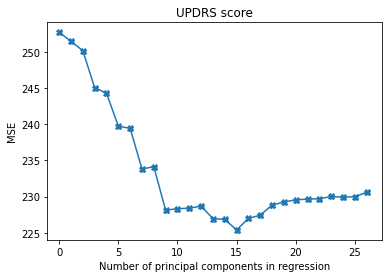

In [14]:
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), 
                                           Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 27):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], 
                                               Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
      
plt.plot(mse, '-X')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('UPDRS score')
plt.xlim(xmin=-1);

#### Step 9: Amount of variance explained by adding each consecutive principal component

In [16]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 40.53,  57.75,  67.45,  76.67,  83.05,  87.45,  90.04,  92.31,
        94.1 ,  95.03,  95.87,  96.62,  97.27,  97.83,  98.32,  98.75,
        99.14,  99.5 ,  99.76,  99.85,  99.94,  99.99, 100.01, 100.01,
       100.01, 100.01])

##### Note: 
Based on the results obtained from step 8 and step 9, it shows that suitable models such as model with 7 principal components and 9 principal components. However, taking into account that there is a drop from the 8th principal component to 9th. So, the model with 9 principal component is chosen as the suitable model to predict the UPDRS score. The model with 15 principal component is also having a lesser MSE but not chosen because of the 3 consecutive increase in the MSE value of the model with principal component from 10 to 12. Furthermore, The amount of variability shown for the model with 9 principal components is 94.1% which is a good percentage of variability. This indicate that the model with 9 variables is able to explain the data about 94.1%.


### Performing Principal Component Regression, PCR

#### Step 10: perform PCA on the training data and evaluate its test set performance

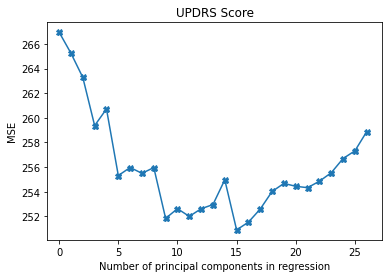

In [17]:
#splitting the training and testing data
pca_new = PCA()
X_train, X_test , Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca_new.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), 
                                           Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 26 principle components, adding one component at the time.
for i in np.arange(1, 27):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], 
                                               Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-X')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('UPDRS Score')
plt.xlim(xmin=-1);

#### Amount of variance explained by adding each consecutive principal component

In [18]:
np.cumsum(np.round(pca_new.explained_variance_ratio_, decimals=4)*100)

array([ 41.58,  59.25,  68.56,  77.28,  83.5 ,  87.8 ,  90.41,  92.74,
        94.4 ,  95.3 ,  96.06,  96.79,  97.47,  98.09,  98.55,  98.91,
        99.26,  99.55,  99.8 ,  99.89,  99.96, 100.01, 100.03, 100.03,
       100.03, 100.03])

##### Note:
Even though the first smallest mse is at 3rd pca, however choosing it might result in missing out some important infomation as the variability itself still low (68.56) so it is adequate to take the 9th principal component as suggested by the k-fold cross-validation approach.

#### Step 11: Evaluating the model performance using the test dataset

#### Using 9 principal components

In [19]:
X_reduced_test = pca_new.transform(scale(X_test))[:,:10] 

regr = LinearRegression()
regr.fit(X_reduced_train[:,:10], Y_train)

pred = regr.predict(X_reduced_test)
mean_squared_error(Y_test, pred)

212.28799464283702

#### Using 5 principal components (the second lowest MSE)

In [20]:
X_reduced_test = pca_new.transform(scale(X_test))[:,:6] 

regr = LinearRegression()
regr.fit(X_reduced_train[:,:6], Y_train)

pred = regr.predict(X_reduced_test)
mean_squared_error(Y_test, pred)

227.7489612563948

##### Note: Trying the 2 suggested PCR model with 9 principal components and 5 principal components. It is found that using model with 9 principal components has a lower MSE compared to the model with 5 principal components.

### Conclusion:

In a nutshell, the best model to predict the UPDRS score is model with 9 principal components. This is 
because the lower MSE value. Furthermore, the variability explained by this model is about 94.4% 
based on the PCR plot, this indicates that this model with 9 variables is adequate enough to predict the 
UPDRS score. Taking into account the law of parsimony where a model should be simple yet gives a 
good prediction, hence choosing the model with 9 principal component is adequate as the mean squared 
error (MSE) is smallest for this model. However, choosing a model lower than 9 variables might be 
resulting in lack of information to predict the model accurately.